In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, color
import cv2
import tensorflow as tf
from keras_segmentation.models.model_utils import get_segmentation_model
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.predict import predict
import os

In [3]:

# create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1)

In [6]:
input_height=200
input_width=200
img_input = tf.keras.Input(shape=(input_height, input_width, 3))

n_classes = 7

# define encoder layers
# conv1 and conv2 contain intermediate the encoder outputs
# which will be used by the decoder
# pool2 is the final output of the encoder

# two convolution layers and one pooling layer, which downsamples image by a factor of 2
conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = tf.keras.layers.Dropout(0.2)(conv1)
conv1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(conv1)
pool1 = tf.keras.layers.MaxPooling2D((2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(pool1)
conv2 = tf.keras.layers.Dropout(0.2)(conv2)
conv2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(conv2)
pool2 = tf.keras.layers.MaxPooling2D((2,2))(conv2)

# decoder layers
conv3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(pool2)
conv3 = tf.keras.layers.Dropout(0.2)(conv3)
conv3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(conv3)

# concat intermediate encoder outputs with intermediate decoder outputs, which is the skip connection
up1 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D((2,2))(conv3), conv2], axis=-1)
conv4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(up1)
conv4 = tf.keras.layers.Dropout(0.2)(conv4)
conv4 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(conv4)

up2 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D((2,2))(conv4), conv1], axis=-1)
conv5 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(up2)
conv5 = tf.keras.layers.Dropout(0.2)(conv5)
conv5 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(conv5)

# get output with proper number of classes
out = tf.keras.layers.Conv2D(n_classes, (1,1), padding='same')(conv5)

In [16]:
checkpoint_path = '../dataset/checkpoints/smaller_checkpoints'
checkpoint_dir = os.path.dirname(checkpoint_path)

# create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1)

model = get_segmentation_model(img_input, out)
model.train(
    train_images = '../dataset/xpl_train_images/',
    train_annotations = '../dataset/train_segmentation/',
    checkpoints_path = checkpoint_path,
    epochs = 5)

Verifying training dataset
100%|██████████| 12000/12000 [00:15<00:00, 775.59it/s]
/Users/kacikus/.virtualenvs/automin_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Dataset verified! 
Epoch 1/5
512/512 [==============================] - 413s 804ms/step - loss: 13.5925 - accuracy: 0.0631
saved  ../dataset/checkpoints/smaller_checkpoints.0
Epoch 2/5
512/512 [==============================] - 418s 816ms/step - loss: 4.4823 - accuracy: 0.2004
saved  ../dataset/checkpoints/smaller_checkpoints.1
Epoch 3/5
512/512 [==============================] - 432s 843ms/step - loss: 2.7788 - accuracy: 0.2493
saved  ../dataset/checkpoints/smaller_checkpoints.2
Epoch 4/5
512/512 [==============================] - 394s 769ms/step - loss: 2.0194 - accuracy: 0.2546
saved  ../dat

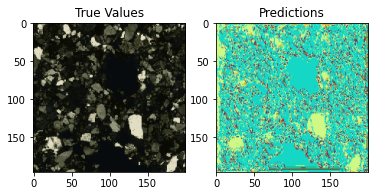

In [31]:
# self made model
i = 784
# get prediction on test set
# out = model.predict_segmentation(
#     inp = f'../dataset/xpl_train_images/img_{i}.png',
#     out_fname = 'output.png')
out = model.predict_segmentation(
    inp = f'Images/xplimg.png',
    out_fname = 'output2.png')

# load the test image
pred_img = Image.open('output2.png').convert('RGB')

# # load original image
# orig_img = Image.open(f'../dataset/train_segmentation/img_{i}.png')

# load original image
orig_img = Image.open(f'Images/xplimg.png')

plt.subplot(1,2,1)
plt.title('True Values')
plt.imshow(orig_img)

plt.subplot(1,2,2)
plt.title('Predictions')
plt.imshow(pred_img)

In [29]:
# explore prediction labels
Image.open('output.png')

array([[[214, 164,  59],
        [110,  76,  92],
        [ 56, 152,  95],
        ...,
        [ 67, 180, 103],
        [152, 145, 107],
        [ 38, 187, 176]],

       [[179, 243, 149],
        [102, 230, 176],
        [112, 231, 166],
        ...,
        [ 46, 194, 143],
        [128, 188, 144],
        [ 43, 203, 183]],

       [[183, 244, 155],
        [183, 244, 155],
        [186, 245, 152],
        ...,
        [ 51, 212, 173],
        [183, 244, 155],
        [ 47, 220, 190]],

       ...,

       [[183, 244, 155],
        [183, 244, 155],
        [183, 244, 155],
        ...,
        [165, 215, 134],
        [119,  62,  81],
        [ 53, 164, 158]],

       [[112, 218, 169],
        [179, 202, 138],
        [195, 246, 144],
        ...,
        [ 74, 132, 134],
        [101,  90, 102],
        [128,  48,  71]],

       [[159, 235, 160],
        [192, 232, 140],
        [207, 248, 132],
        ...,
        [113,  71,  88],
        [ 83, 118, 123],
        [206, 132,  47]]

In [ ]:
plt.imshow(labels)
unique, counts = np.unique(np.array(labels), return_counts=True)

frequencies = np.asarray((unique, counts))

print(frequencies)

In [9]:
checkpoint_path = '../dataset/checkpoints/dataset/checkpoints/checkpoint.ckpt'

# custom model
model = get_segmentation_model(img_input, out)
# model.train(
#     train_images = '../dataset/xpl_train_images/',
#     train_annotations = '../dataset/train_segmentation/',
#     checkpoints_path = '../dataset/custom_checkpoints/xpl_net',
#     epochs = 5)

# load the weights
model.load_weights(checkpoint_path)

# re-evaluate the model
# loss, acc = model.evaluate()

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ../dataset/checkpoints/dataset/checkpoints/checkpoint.ckpt